## 题目：92. 反转链表 II
#### 反转从位置 m 到 n 的链表。请使用一趟扫描完成反转。

说明:
1 ≤ m ≤ n ≤ 链表长度。

#### 输入: 1->2->3->4->5->NULL, m = 2, n = 4
#### 输出: 1->4->3->2->5->NULL

#### 解题思路：
 for(int i=m+1;i<=n;i++)
   把第i个节点插入到第m-1个节点之后
   ******
1 -> 2 -> **3** -> 4 -> 5 -> NULL

1 -> **3** -> 2 -> 4 -> 5 -> NULL

1 -> 3 -> 2 -> **4** -> 5 -> NULL

1 -> **4** -> 3 -> 2 -> 5 -> NULL

In [ ]:
/**
 * Definition for singly-linked list.
 * struct ListNode {
 *     int val;
 *     ListNode *next;
 *     ListNode(int x) : val(x), next(NULL) {}
 * };
 */
class Solution {
public:
    ListNode* reverseBetween(ListNode* head, int m, int n) {
        //时间复杂度O(n),空间复杂度O(1)
        ListNode *p=new ListNode(-1),*pre=p;
        p->next=head;
        for(int i=0;i<m-1;++i){
            pre=pre->next;
        }
        ListNode *cur=pre->next;
        for(int i=m;i<n;++i){
            ListNode *t=cur->next;
            
            cur->next=t->next;
            t->next=pre->next;
            pre->next=t;
            
            
        }
        return p->next;
        
    }
};

## 题目：142. 环形链表 II
#### 给定一个链表，返回链表开始入环的第一个节点。 如果链表无环，则返回 null。

#### 为了表示给定链表中的环，我们使用整数 pos 来表示链表尾连接到链表中的位置（索引从 0 开始）。 如果 pos 是 -1，则在该链表中没有环。

### 说明：不允许修改给定的链表。


#### 输入：head = [3,2,0,-4], pos = 1
#### 输出：tail connects to node index 1
#### 解释：链表中有一个环，其尾部连接到第二个节点。


#### 因为快指针每次走2，慢指针每次走1，快指针走的距离是慢指针的两倍。而快指针又比慢指针多走了一圈。所以 head 到环的起点+环的起点到他们相遇的点的距离 与 环一圈的距离相等。现在重新开始，head 运行到环起点 和 相遇点到环起点 的距离也是相等的，相当于他们同时减掉了 环的起点到他们相遇的点的距离。代码如下：

In [ ]:
 /** 
     * 算法证明：
     *    设快慢指针第一次相遇时，fast走了f步，slow走了s步，
     *    设环的长度为c，从表头到入环点需走t步，那么：
     *（1）当fast指针追上slow指针时，fast比slow多走了n个环的长度，即 f = s + n * c；
     *（2）同时，因为fast一次走2步，slow一次走1步，因此有 f = 2s；
     *    由此可得：s = n * c，f = 2 * n * c
     * 
     *    将slow退到起始点，fast不动，然后每人一次各走一步：
     * 当slow走到入环点时，它走了t（ = 0 * c + t ）步；而此时fast走了 2 * n * c + t 步，也到达了入环点
     * 说明他们正好相遇在了入环点。
     *   
     */

/**
 * Definition for singly-linked list.
 * struct ListNode {
 *     int val;
 *     ListNode *next;
 *     ListNode(int x) : val(x), next(NULL) {}
 * };
 */
class Solution {
public:
    ListNode *detectCycle(ListNode *head) {
        //时间复杂度为O(n),空间复杂度为O(1)
        ListNode *slow=head,*fast=head;
        while(fast&&fast->next){
            slow=slow->next;
            fast=fast->next->next;
            if(slow==fast)
                break;
        }
        if(!fast||!fast->next)
            return NULL;
        slow=head;
        while(slow!=fast){
            slow=slow->next;
            fast=fast->next;
        }
        return fast;
    }
};

#### 总结：快慢指针在有环链表中的应用

## 题目：19. 删除链表的倒数第N个节点

#### 给定一个链表，删除链表的倒数第 n 个节点，并且返回链表的头结点。
给定一个链表: 1->2->3->4->5, 和 n = 2.

当删除了倒数第二个节点后，链表变为 1->2->3->5.

#### 用两个指针来帮助我们解题，pre和cur指针。首先cur指针先向前走N步，如果此时cur指向空，说明N为链表的长度，则需要移除的为首元素，那么此时我们返回head->next即可，如果cur存在，我们再继续往下走，此时pre指针也跟着走，直到cur为最后一个元素时停止，此时pre指向要移除元素的前一个元素，我们再修改指针跳过需要移除的元素即可。代码如下：

In [ ]:
/**
 * Definition for singly-linked list.
 * struct ListNode {
 *     int val;
 *     ListNode *next;
 *     ListNode(int x) : val(x), next(NULL) {}
 * };
 */
class Solution {
public:
    ListNode* removeNthFromEnd(ListNode* head, int n) {
        //时间复杂度为O(n),空间复杂度为O(1)
        ListNode *p=new ListNode(-1);
        p->next=head;
        ListNode *pre=p,*cur=p;
        for(int i=0;i<n;++i)
            pre=pre->next;
        while(pre->next!=NULL){
            pre=pre->next;
            cur=cur->next;
        }
        cur->next=cur->next->next;
        return p->next;
    }
};

#### 总结：遇到与链表相关的题目要多画图，仔细思考链表的父节点的子节点，要与指针相结合。

******

# 与链表有环相关问题汇总：


#### 1. 环的长度是多少？

#### 2. 如何找到环中第一个节点（即Linked List Cycle II）？

#### 3. 如何将有环的链表变成单链表（解除环）？

#### 4. 如何判断两个单链表是否有交点？如何找到第一个相交的节点？

#### 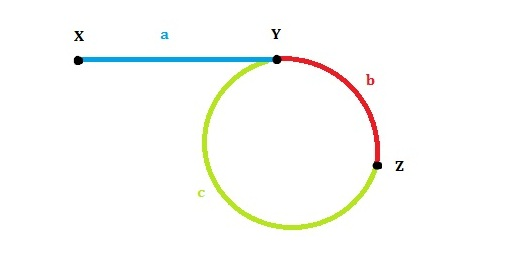

#### 设：链表头是X，环的第一个节点是Y，slow和fast第一次的交点是Z。各段的长度分别是a,b,c，如图所示。环的长度是L。slow和fast的速度分别是qs,qf。



### 1. 环的长度是多少？

#### 1. 方法一：

第一次相遇后，让slow,fast继续走，记录到下次相遇时循环了几次。因为当fast第二次到达Z点时，fast走了一圈，slow走了半圈，而当fast第三次到达Z点时，fast走了两圈，slow走了一圈，正好还在Z点相遇。


#### 方法二：

第一次相遇后，让fast停着不走了，slow继续走，记录到下次相遇时循环了几次。

#### 方法三（最简单）：

第一次相遇时slow走过的距离：a+b，fast走过的距离：a+b+c+b。

因为fast的速度是slow的两倍，所以fast走的距离是slow的两倍，有 2(a+b) = a+b+c+b，可以得到a=c（这个结论很重要！）。

我们发现L=b+c=a+b，也就是说，从一开始到二者第一次相遇，循环的次数（即慢指针以速度1走的距离）就等于环的长度。

*****

### 2. 如何找到环中第一个节点（即Linked List Cycle II）？
#### 我们已经得到了结论a=c，那么让两个指针分别从X和Z开始走，每次走一步，那么正好会在Y相遇！也就是环的第一个节点。
*****

### 3. 如何将有环的链表变成单链表（解除环）？
#### 在上一个问题的最后，将c段中Y点之前的那个节点与Y的链接切断即可。



*****


### 4. 如何判断两个单链表是否有交点？如何找到第一个相交的节点？
#### 如何判断两个单链表是否有交点？先判断两个链表是否有环，如果一个有环一个没环，肯定不相交；如果两个都没有环，判断两个列表的尾部是否相等；如果两个都有环，判断一个链表上的Z点是否在另一个链表上。
#### 如何找到第一个相交的节点？求出两个链表的长度L1,L2（如果有环，则将Y点当做尾节点来算），假设L1<L2，用两个指针分别从两个链表的头部开始走，长度为L2的链表先走(L2-L1)步，然后两个一起走，直到二者相遇。
*****